### Decision Tree 
Decision tree a very usefull machine learning algorithm to solve both classification and Regression problems.It is also a fundamentel components of Random Forest which is most powerful machine learning algorith availabel today.As its name suggest this algo use tree like model of decisions.This is a flow chart like structure where internal node represents features,the branch represents a decision rule, and each leaf node represents the outcome,the top most node is known as root node.
<img src='Treeinfo1.JPG'>
This image represent a decisions tree visualization for iris data_set.In this tree image petal length(cm) is `root node` and the down side nodes which have no other child nodes is called leaf node.
<img src='tree.JPG'>

### Decision Tree Regressor

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [58]:
diabities = datasets.load_diabetes()
diabities.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [59]:
diabities.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\n

Ten baseline variables, age, sex, body mass index, average blood\n
pressure, and six blood serum measurements were obtained for each of n =\n
442 diabetes patients, as well as the response of interest, a\n
quantitative measure of disease progression one year after baseline.\n\n
**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :
Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  
:Attribute Information:\n      - Age\n      
- Sex\n      - Body mass index\n     

- Average blood pressure\n      - S1\n   
- S2\n      - S3\n      - S4\n  
- S5\n      - S6\n\n

Note: `Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1)`.\n\n
Source URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nBradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.\n(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)'

In [60]:
diabities.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [61]:
diabities.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [62]:
diabities.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [63]:
X = diabities.data
y = diabities.target


In [64]:
df = pd.DataFrame(X,columns=diabities.feature_names)

In [65]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [66]:
df['target']=y

In [67]:
df[:90]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
85,0.045341,-0.044642,0.071397,0.001215,-0.009825,-0.001001,0.015505,-0.039493,-0.041180,-0.071494,141.0
86,-0.070900,0.050680,-0.075186,-0.040099,-0.051103,-0.015092,-0.039719,-0.002592,-0.096433,-0.034215,55.0
87,0.045341,-0.044642,-0.006206,0.011544,0.063101,0.016222,0.096501,-0.039493,0.042896,-0.038357,134.0
88,-0.052738,0.050680,-0.040696,-0.067642,-0.031840,-0.037013,0.037595,-0.039493,-0.034524,0.069338,42.0


### Decision Tree Regressor

In [75]:
X_train,X_test,y_train, y_test, = train_test_split(X,y,test_size=0.20,random_state=42)

In [76]:
regressor = DecisionTreeRegressor(random_state=42)

In [77]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [78]:
y_predict = regressor.predict(X_test)

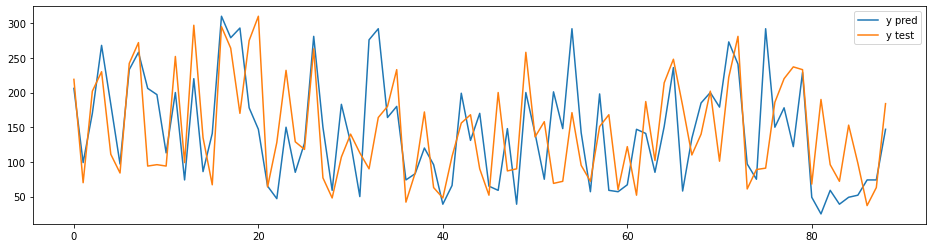

In [79]:
plt.figure(figsize=(16,4))
plt.plot(y_predict,label='y pred')

plt.plot(y_test,label='y test')
plt.legend()

In [80]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

70.61829663921893

In [81]:
y_test.std()

72.78840394263774

##  Decision Tree as a Classifier

In [82]:
 from sklearn.tree import DecisionTreeClassifier

In [83]:
iris = datasets.load_iris()

In [84]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [85]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [86]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [87]:
X = iris.data
y = iris.target

In [88]:
X.shape,y.shape

((150, 4), (150,))

In [51]:
df = pd.DataFrame(X,columns=iris.feature_names)

In [52]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
df['target']= iris.target

In [54]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [55]:
# sns.pairplot(df)

In [97]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [98]:
X.shape,y.shape

((150, 4), (150,))

In [99]:
X_train.shape,X_test.shape

((120, 4), (30, 4))

In [100]:
y_train.shape

(120,)

In [106]:
X_test

array([[7.3, 2.9, 6.3, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 2.5, 3. , 1.1],
       [4.8, 3.4, 1.6, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.5, 1.4, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [6.4, 2.7, 5.3, 1.9],
       [5.6, 2.8, 4.9, 2. ],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.5, 2.3, 4. , 1.3],
       [6.8, 3. , 5.5, 2.1],
       [6. , 2.2, 4. , 1. ],
       [5.7, 2.5, 5. , 2. ],
       [5.7, 4.4, 1.5, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [6.1, 2.8, 4. , 1.3],
       [4.9, 2.4, 3.3, 1. ],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.9, 4.3, 1.3],
       [5.6, 3. , 4.5, 1.5],
       [4.9, 3.6, 1.4, 0.1],
       [4.4, 2.9, 1.4, 0.2],
       [6.5, 3. , 5.2, 2. ],
       [4.9, 2.5, 4.5, 1.7],
       [5.4, 3.9, 1.7, 0.4],
       [4.8, 3. , 1.4, 0.1],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 2.8, 4.6, 1.5]])

In [107]:
clf = DecisionTreeClassifier(criterion='gini',random_state=1)

In [110]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [111]:
 clf.predict(X_test)

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

In [118]:
X_test.shape

(30, 4)

In [117]:
clf.predict(X_test[[29]])

array([1])

(30, 4)

In [116]:
clf.predict(X_test[[29]])

array([1])

In [119]:
print('Accuracy:',metrics.accuracy_score(y_test,y_predict))

Accuracy: 0.9666666666666667


In [130]:
print('Confusion Matrix:')
mat = metrics.confusion_matrix(y_test,y_predict)
mat

Confusion Matrix:


array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

Text(33.0, 0.5, 'True_values')

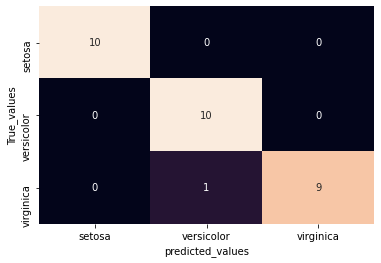

In [139]:
sns.heatmap(mat,annot=True,cbar=False,xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.xlabel('predicted_values')
plt.ylabel('True_values')

In [140]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

